In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mtl
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay

## Loading Dataset

In [2]:
df = pd.read_csv("spam.csv")

## Data Cleaning

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df_null=df[(df["Message"].isnull() == True) | (df["Category"].isnull() ==True)]
df_null

,Category,Message


In [7]:
df_uniqueSpamHam=df["Category"].unique()
df_uniqueSpamHam

array(['ham', 'spam'], dtype=object)

## Exploratory Data Analysis

In [8]:
SpamHamCount= df["Category"].value_counts(ascending=True)
SpamHamCount

Category
spam     747
ham     4825
Name: count, dtype: int64

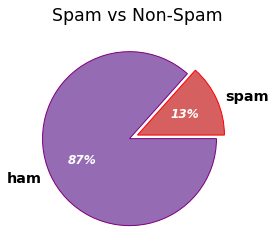

In [9]:
palette_color = sns.color_palette('muted')[3:5]
patchs,texts,autotexts=plt.pie(SpamHamCount, labels=['spam','ham'],colors=palette_color,explode=[0,0.1],autopct= '%.0f%%');
plt.title("Spam vs Non-Spam",fontsize='xx-large',color='black');
for text in texts:
    text.set_color('black')
    text.set_fontsize('x-large')
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize('large')
    autotext.set_fontweight('bold')
    autotext.set_fontstyle('italic')
    
patchs[1].set_edgecolor('purple')
patchs[0].set_edgecolor('red')

## Data preprocessing

In [46]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['Message'])
le=LabelEncoder()
y=le.fit_transform(df['Category'])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection

In [120]:
models = {
    'LogisticRegression': LogisticRegression(),
    'MultinomialNB': MultinomialNB(),
    'SVC': SVC()
}
param_grids = {
    'LogisticRegression': {'clf__C': [0.1, 1, 10]},
    'MultinomialNB': {'clf__alpha': [0.1, 1, 10]},
    'SVC': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf']}
}

best_models = {}
for name in models:
    pipeline = Pipeline([
        ('clf', models[name])
    ])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    model=grid_search.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    best_models[name] = (grid_search.best_estimator_,accuracy_score(y_test, y_pred))
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for LogisticRegression: {'clf__C': 10}
Best parameters for MultinomialNB: {'clf__alpha': 0.1}
Best parameters for SVC: {'clf__C': 10, 'clf__kernel': 'linear'}


In [123]:
for name, model in best_models.items():
    y_pred = model[0].predict(X_test)
    print(f"Evaluation for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

Evaluation for LogisticRegression:
Accuracy: 0.97847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

[[966   0]
 [ 24 125]]
Evaluation for MultinomialNB:
Accuracy: 0.9856502242152466
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.96      0.95       149

    accuracy                           0.99      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[956  10]
 [  6 143]]
Evaluation for SVC:
Accuracy: 0.9820627802690582
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.

In [125]:
best_model_name = max(best_models, key=lambda name: best_models[name][1])
best_model = best_models[best_model_name][0]

print(f"The best model is {best_model_name} with an accuracy of {best_models[best_model_name][1]:.4f}")

The best model is MultinomialNB with an accuracy of 0.9857


## Model Evaluation

In [129]:
y_pred = best_model.predict(X_test)

print(f"Final Evaluation for {best_model_name}:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(f"{best_model_name} Confusion Matrix:")
print(cm)

Final Evaluation for MultinomialNB:
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.93      0.96      0.95       149

    accuracy                           0.99      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

MultinomialNB Confusion Matrix:
[[956  10]
 [  6 143]]


Text(0.5, 1.0, 'Confusion Matrix for MultinomialNB')

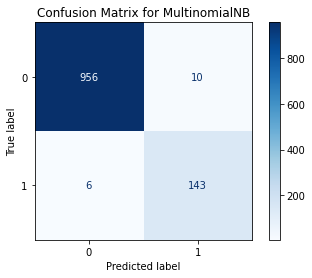

In [131]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix for {best_model_name}");